In [1]:
import sys
sys.path.append('../../Share')
import config
import baseline
import Target

import numpy as np
import pandas as pd

In [2]:
baseline_K_val = [1, 4]
SUBJECT = "Carlson"

if __name__ == "__main__":
    for K in baseline_K_val:
        trainer = baseline.TremorModelTrainer(config, subject=SUBJECT)
        trainer.run_all_sessions_training_K_data(K)
        df = trainer.save_results(f'../Results/Baseline_results_train_with_{K}data_C.csv')
# 저장해놨어서 데이터 업데이트 전에 한번 돌리면 굳이 안돌려도 됨'''

Dataset 1/8 - Session Exp_2025-06-30-v1/E9AD0E7DCC2B/
(8493, 4, 14, 1) (8493,) (86, 4, 14, 1) (86,)
Dataset 2/8 - Session Exp_2025-06-30-v2/E9AD0E7DCC2B/
Start Training (total epochs: 50)...
Finish Training! (Model is saved)
Maximum training accuracy : 82.14%
Maximum validation accuracy : 89.53%
Accuracy of test dataset using model V0: 88.3721%
Dataset 3/8 - Session Exp_2025-07-09-v1/E9AD0E7DCC2B/
Accuracy on unseen dataset: 85.3497%
Dataset 4/8 - Session Exp_2025-07-09-v2/E9AD0E7DCC2B/
Accuracy on unseen dataset: 84.9872%
Dataset 5/8 - Session Exp_2025-07-10-v1/E9AD0E7DCC2B/
There is more than one dataset - check - C:/Users/hml76/OneDrive/문서/MATLAB/Data_Carlson/Exp_2025-07-10-v1/E9AD0E7DCC2B//raw/ - ['1/', '2/', '3/', '4/', '5/']
Accuracy on unseen dataset: 86.9253%
Dataset 6/8 - Session Exp_2025-07-10-v2/E9AD0E7DCC2B/
Accuracy on unseen dataset: 85.4082%
Dataset 7/8 - Session Exp_2025-07-11-v1/E9AD0E7DCC2B/
Accuracy on unseen dataset: 84.4239%
Dataset 8/8 - Session Exp_2025-07-11-v2/

In [4]:
b_path = '/NCI_mindforce'
baseline_K = ['1', '4']
baselines = []

for idx, K in enumerate(baseline_K):
    baselines.append(b_path + f'/github/Results/Baseline_results_train_with_{K}data_C.csv')


Dataset 1/8 - Session Exp_2025-06-30-v1/E9AD0E7DCC2B/
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 81.26%
Maximum validation accuracy : 82.7%

Dataset 2/8 - Session Exp_2025-06-30-v2/E9AD0E7DCC2B/
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 83.59%
Maximum validation accuracy : 83.53%

Dataset 3/8 - Session Exp_2025-07-09-v1/E9AD0E7DCC2B/
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 84.9%
Maximum validation accuracy : 87.94%

Dataset 4/8 - Session Exp_2025-07-09-v2/E9AD0E7DCC2B/
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 85.21%
Maximum validation accuracy : 87.55%

Dataset 5/8 - Session Exp_2025-07-10-v1/E9AD0E7DCC2B/
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 82.36%
Maximum validation accur

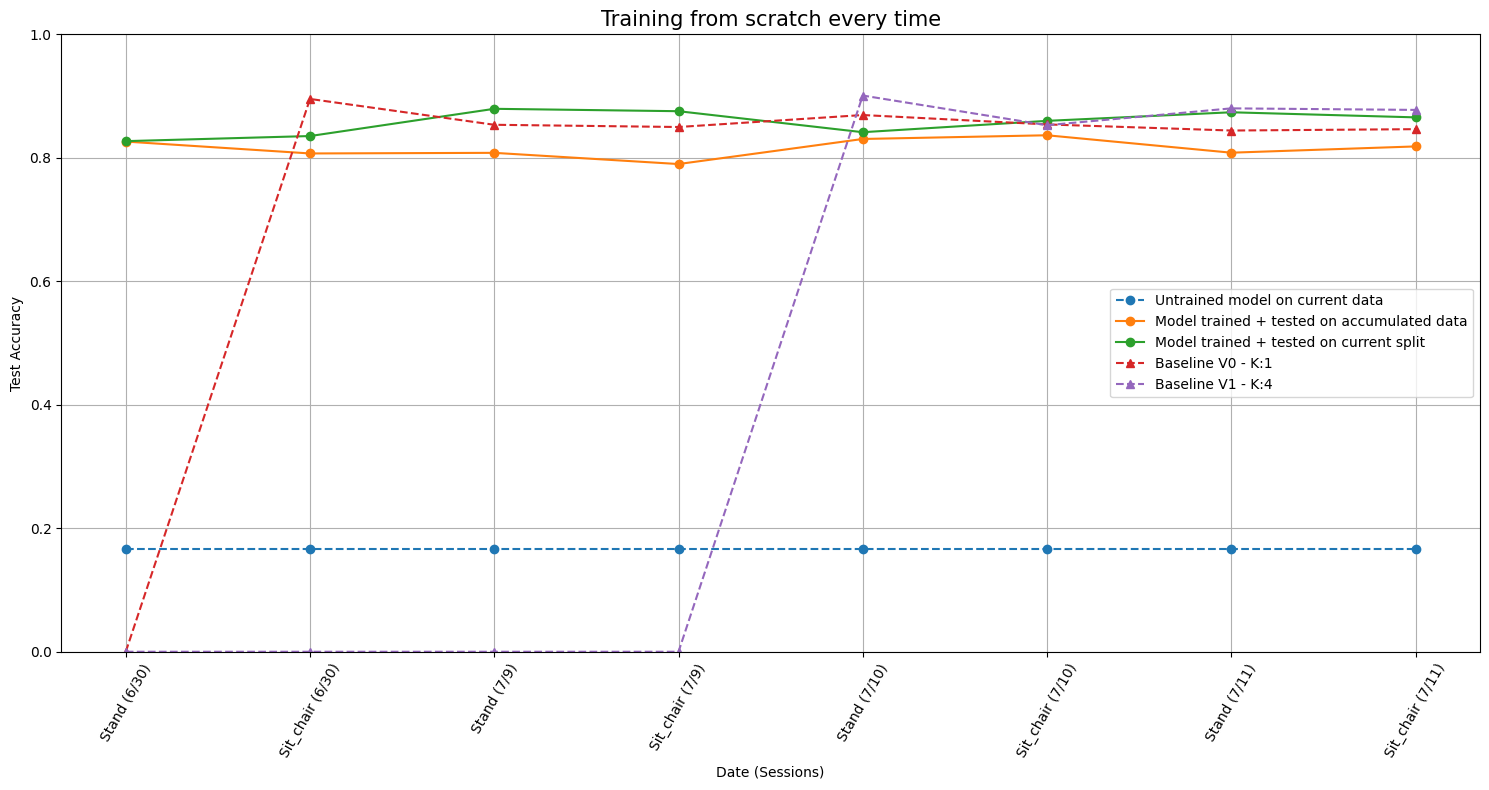

Average of acc without training anything (should be random): 14.10%
Average of acc using previous test data after training: 85.72%
Average of acc using current test data after training: 81.56%
Baseline K-1: 85.90%
Baseline K-4: 87.78%


In [6]:
import Target

prog_trainer = Target.ProgressiveTrainer(config, subject=SUBJECT)
Init_acc_all, Prev_acc_all, Trained_acc_all = prog_trainer.run(plot_learning_curve=False)
prog_trainer.plot_results(baselines, baseline_K)

for idx, x in enumerate([Init_acc_all, Prev_acc_all, Trained_acc_all]):
    if idx==0:
        print(f"Average of acc without training anything (should be random): {np.mean(x)*100:.2f}%")
    elif idx==1:
        print(f"Average of acc using previous test data after training: {np.mean(x)*100:.2f}%")
    elif idx==2:
        print(f"Average of acc using current test data after training: {np.mean(x)*100:.2f}%")
for idx, b in enumerate(baselines):
    print(f"Baseline K-{baseline_K[idx]}: {float(np.mean(pd.read_csv(baselines[idx])['Accuracy'][int(baseline_K[idx]):])):.2f}%")